#### **Package yang digunakan**

In [ ]:
import plotly.express as px #show pie chart
import matplotlib.pyplot as plt #untuk show boxplot
import pandas as pd #untuk import dan mengolah dataset
import numpy as np #untuk mengolah dataset
import seaborn as sns #untuk menampilkan heatmap correlation plot
import warnings
warnings.filterwarnings('ignore')

#### **Load Data**

In [ ]:
#kami akan mengimport dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Kode di bawah ini perlu disesuaikan dengan lokasi penyimpanan datanya.
#dapat langsung dijalankan jika folder drive kami sudah dibuatkan shortcut ke drive Anda

#Data gedung
gd = pd.read_csv('/content/drive/MyDrive/TUGAS 1 - Kelompok C - EDA dan Visualisasi Data (A) /building_metadata.csv')
print("Head Data Gedung")
print(gd.head())
print("Informasi Data Gedung")
print(gd.info())

#Data Energi Gedung
en = pd.read_csv('/content/drive/MyDrive/TUGAS 1 - Kelompok C - EDA dan Visualisasi Data (A) /train.csv')
print("Head Data Energi Gedung")
print(en.head())
print("Informasi Data Energi Gedung")
print(en.info())

#Data Cuaca
cu = pd.read_csv('/content/drive/MyDrive/TUGAS 1 - Kelompok C - EDA dan Visualisasi Data (A) /weather_train.csv')
print("Head Data Cuaca")
print(cu.head())
print("Informasi Data Cuaca")
print(cu.info())

Head Data Gedung
   site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN
Informasi Data Gedung
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB
None
Head Da

Di atas kita sudah mendapatkan head setiap data train beserta tipe data setiap variabelnya. Selanjutnya kita akan melakukan merge ketiga data tersebut dengan menyocokkan:
* ```'building_id'``` pada data gedung (gd) dan data energi gedung (en)
* ```'site_id'``` dan ```'timestamp'``` pada data gedung (gd) dan data cuaca (cu)

In [ ]:
#merge ketiga data
data = gd.merge(en, on = 'building_id', how = 'left').merge(cu,on = ('site_id','timestamp'), how = 'left')
data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,0,Education,7432,2008.0,NaN,0,2016-01-01 01:00:00,0.0,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,0,Education,7432,2008.0,NaN,0,2016-01-01 02:00:00,0.0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,0,Education,7432,2008.0,NaN,0,2016-01-01 03:00:00,0.0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,0,Education,7432,2008.0,NaN,0,2016-01-01 04:00:00,0.0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


## **_Exploratory Data Analysis_**

---



### **_Business_ dan _Data Understanding_**

* ASHRAE adalah organisasi masyarakat global yang bertujuan untuk memajukan kesejahteraan manusia melalui teknologi berkelanjutan untuk lingkungan binaan. ASHRAE berfokus pada sistem bangunan, efisiensi energi, kualitas udara dalam ruangan, pendinginan dan keberlanjutan dalam industri.
* Pada tugas ini kami akan melakukan Exploratory Data Analysis pada data-data dari ASHRAE.
* Data yang akan kami eksplorasi adalah data yang akan digunakan untuk menaksir peningkatan energi efisiensi dengan membangun sebuah model dari data histori penggunaan energi dan cuaca.

**Mencari informasi data**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   site_id             int64  
 1   building_id         int64  
 2   primary_use         object 
 3   square_feet         int64  
 4   year_built          float64
 5   floor_count         float64
 6   meter               int64  
 7   timestamp           object 
 8   meter_reading       float64
 9   air_temperature     float64
 10  cloud_coverage      float64
 11  dew_temperature     float64
 12  precip_depth_1_hr   float64
 13  sea_level_pressure  float64
 14  wind_direction      float64
 15  wind_speed          float64
dtypes: float64(10), int64(4), object(2)
memory usage: 2.6+ GB
None


In [ ]:
#Informasi beberapa data kategorik
banyak_lokasi = data['site_id'].unique()
print('Daftar site_id \n',banyak_lokasi)
print('Banyaknya lokasi gedung: ',len(banyak_lokasi),'\n')

banyak_gedung = data['building_id'].unique()
print('Daftar building_id \n',banyak_gedung)
print('Banyaknya gedung: ',len(banyak_gedung),'\n')

peruntukan_gedung = data['primary_use'].unique()
print('Daftar peruntukan gedung: ',peruntukan_gedung)
print('Banyaknya kategori peruntukan gedung: ',len(peruntukan_gedung),'\n')

jenis_meter = data['meter'].unique()
print('Jenis meter yang digunakan: ',jenis_meter)
print('Banyaknya jenis meter yang digunakan: ',len(jenis_meter))

Daftar site_id 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Banyaknya lokasi gedung:  16 

Daftar building_id 
 [   0    1    2 ... 1446 1447 1448]
Banyaknya gedung:  1449 

Daftar peruntukan gedung:  ['Education' 'Lodging/residential' 'Office'
 'Entertainment/public assembly' 'Other' 'Retail' 'Parking'
 'Public services' 'Warehouse/storage' 'Food sales and service'
 'Religious worship' 'Healthcare' 'Utility' 'Technology/science'
 'Manufacturing/industrial' 'Services']
Banyaknya kategori peruntukan gedung:  16 

Jenis meter yang digunakan:  [0 1 3 2]
Banyaknya jenis meter yang digunakan:  4


Dari gabungan ketiga data tersebut, kita memiliki 16 kolom informasi yaitu:

1. site_id : ID lokasi gedung, data dikumpulkan dari 16 lokasi
2. building_id : ID gedung, data dikumpulkan dari 1449 gedung
3. primary_use : Peruntukan gedung yang terdiri dari 16 kategori
4. square_feet : Luas bangunan gedung
5. year_built : Tahun pembuatan gedung
6. floor_count : Banyaknya lantai yang ada di gedung
7. meter: Jenis meter reading penggunaan energi gedung. Terdapat 4 jenis yaitu ```0```: electricity, ```1```: chilledwater, ```2```: steam, ```3```:hotwater
8. time_stamp : Waktu pengukuran (energi dan cuaca)
9. meter_reading : Konsumsi energi (kWh atau ekivalen)
10. air_temperature : Suhu udara (derajat celcius)
11. cloud_coverage : Porsi langit yang tertutup awan (okta)
12. dew_temperature : Suhu embun (derajat celcius)
13. precip_depth_1_hr : Precipitation (milimeter)
14. sea_level_pressure : Tekanan permukaan laut (milibar/hectopascals)
15. wind_direction : Arah angin (0-360)
16. wind_speed : Kecepatan Angin (m/s)

**Ubah beberapa tipe data yang tidak sesuai**

Dikarenakan terdapat beberapa data kategorik yang terdeteksi sebagai integer atau float sebelumnya, maka kita akan mengubah tipe data tersebut menjadi 'category'

In [ ]:
data['site_id'] = data['site_id'].astype('category')
data['building_id'] = data['building_id'].astype('category')
data['primary_use'] = data['primary_use'].astype('category')
data['meter'] = data['meter'].astype('category')

Data timestamp seharusnya merupakan tipe data datetime, maka kami akan mengubahnya pula.

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   site_id             category      
 1   building_id         category      
 2   primary_use         category      
 3   square_feet         int64         
 4   year_built          float64       
 5   floor_count         float64       
 6   meter               category      
 7   timestamp           datetime64[ns]
 8   meter_reading       float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
dtypes: category(4), datetime64[ns](1), float64(10), int64(1)
memory usage: 2.1 GB


Tipe data sudah sesuai.

Data terdiri dari 16 kolom dan 20216100 observasi (baris)

In [ ]:
# Hapus data duplikat
data.drop_duplicates()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,0,Education,7432,2008.0,NaN,0,2016-01-01 01:00:00,0.000,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,0,Education,7432,2008.0,NaN,0,2016-01-01 02:00:00,0.000,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,0,Education,7432,2008.0,NaN,0,2016-01-01 03:00:00,0.000,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,0,Education,7432,2008.0,NaN,0,2016-01-01 04:00:00,0.000,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,15,1448,Office,92271,2001.0,NaN,0,2016-12-31 19:00:00,3.400,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
20216096,15,1448,Office,92271,2001.0,NaN,0,2016-12-31 20:00:00,2.700,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
20216097,15,1448,Office,92271,2001.0,NaN,0,2016-12-31 21:00:00,3.050,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
20216098,15,1448,Office,92271,2001.0,NaN,0,2016-12-31 22:00:00,3.125,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


Tidak ada data duplikat sehingga data tetap terdiri dari 16 kolom dan 20216100 baris.

### **Pre Processing**

#### **Statistika Deskriptif**

In [ ]:
data.describe()

,square_feet,year_built,floor_count,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,8.088455e+06,3.506933e+06,2.021610e+07,2.011944e+07,1.139074e+07,2.011596e+07,1.646708e+07,1.898443e+07,1.876705e+07,2.007242e+07
mean,1.077830e+05,1.968277e+03,4.184848e+00,2.117121e+03,1.598795e+01,1.900423e+00,7.747429e+00,7.964155e-01,1.016085e+03,1.730151e+02,3.377525e+00
std,1.171424e+05,3.020815e+01,4.008277e+00,1.532356e+05,1.094729e+01,2.402909e+00,1.017867e+01,7.468997e+00,7.060539e+00,1.140574e+02,2.265694e+00
min,2.830000e+02,1.900000e+03,1.000000e+00,0.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.252700e+04,1.951000e+03,1.000000e+00,1.830000e+01,8.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011600e+03,7.000000e+01,2.100000e+00
50%,7.270900e+04,1.969000e+03,3.000000e+00,7.877500e+01,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00
75%,1.391130e+05,1.993000e+03,6.000000e+00,2.679840e+02,2.410000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020500e+03,2.800000e+02,4.600000e+00
max,8.750000e+05,2.017000e+03,2.600000e+01,2.190470e+07,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


Fungsi ```describe()``` diatas berjalan untuk variabel dengan tipe data float atau integer. Fungsi tersebut menunjukkan banyaknya data (```count```), rata-rata (```mean```), standar deviasi (```std```), data terkecil (```min```), kuartil bawah (```25%```), median (```50%```), kuartil atas (```75%```), dan data terbesar (```max```) untuk setiap variabel.

#### **Outliers Detection**

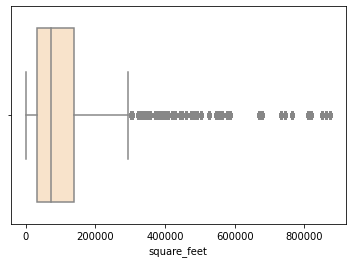

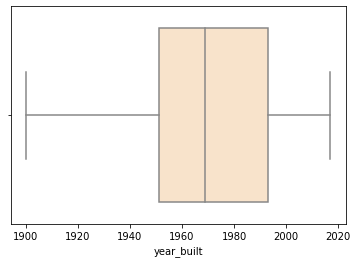

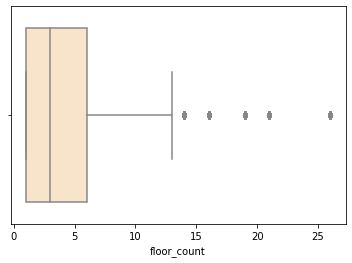

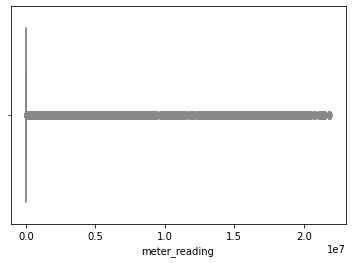

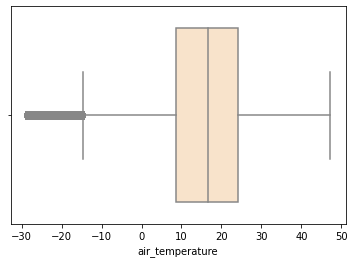

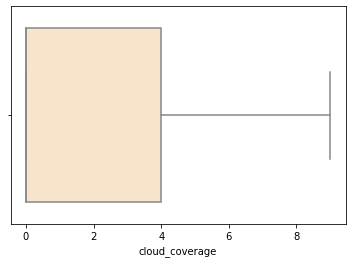

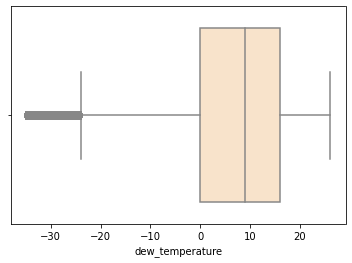

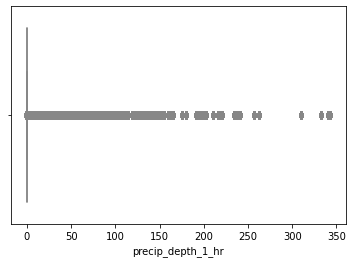

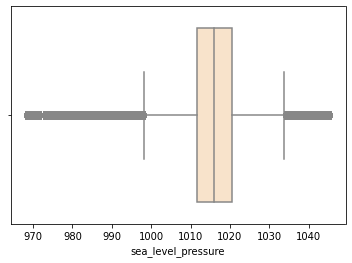

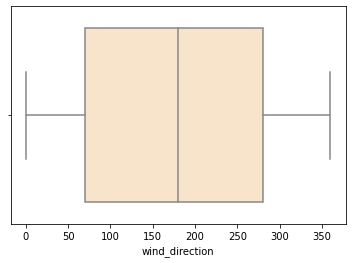

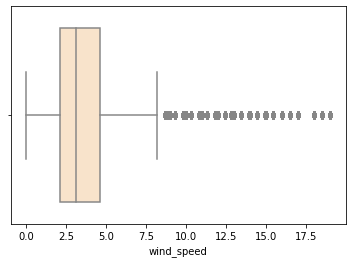

In [ ]:
##Deteksi Outlier dengan boxplot

kolom = data.columns.values
for i in kolom:
    if data[i].dtype=='float64'or data[i].dtype=='int64':
       sns.boxplot(data[i],color='bisque')
       plt.show()

Dari boxplot di atas dapat dilihat bahwa hampir semua variabel memiliki outlier, dan dengan jumlah yang cukup banyak.

#### **Missing Values Detection**

In [ ]:
#Jumlah Missing Values pada setiap variabel/kolom
data.isna().sum().to_frame('jumlah missing')

,jumlah missing
site_id,0
building_id,0
primary_use,0
square_feet,0
year_built,12127645
floor_count,16709167
meter,0
timestamp,0
meter_reading,0
air_temperature,96658


Dapat dilihat bahwa terdapat banyak kolom yang memiliki missing values. Kolom-kolom tersebut adalah, ```year_built``` (Tahun pembuatan gedung), ```floor_count``` (Jumlah lantai gedung), ```air_temperature``` (Suhu udara), ```cloud_coverage```, dll. Kemudian akan dilihat persentase missing values tersebut dari keseluruhan data.

In [ ]:
#Persentase missing values
(data.isnull().sum()/len(data)*100).to_frame('persentase missing')

,persentase missing
site_id,0.000000
building_id,0.000000
primary_use,0.000000
square_feet,0.000000
year_built,59.990033
floor_count,82.652772
meter,0.000000
timestamp,0.000000
meter_reading,0.000000
air_temperature,0.478124


#### **Dealing with Outliers and Missing Values**

Akan dilihat nilai korelasi antar variabel dengan heatmap correlation.

**Heatmap correlation**

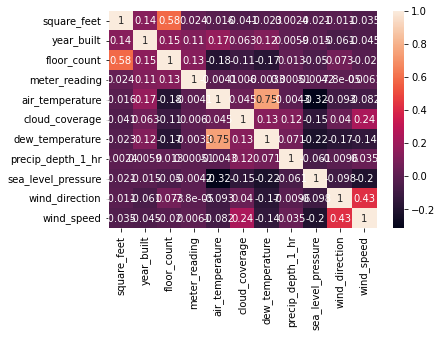

In [ ]:
#heatmap correlation
sns.heatmap(data.corr(),annot=True)

**Missing Values**

Untuk variabel-variabel dengan jumlah missing values yang sangat banyak (>40%) yaitu ```year_built```, ```floor_count```, dan ```cloud_coverage``` dapat dilihat bahwa ketiga variabel ini tidak begitu berkorelasi dengan variabel lainnya kecuali ```floor_count``` (persentase missing values 82,65%) yang berkorelasi cukup tinggi dengan ```square_feet```. Hal ini jelas karena semakin banyak lantai dalam gedung, maka akan semakin luas pula gedung tersebut. Dan kami berpikir bahwa variabel ```square_feet``` dapat mewakili ```floor_count``` sehingga ```floor_count``` tidak kami ikutsertakan di eksplorasi selanjutnya. Sedangkan untuk ```year_built``` dan ```cloud_coverage``` tidak memiliki korelasi yang tinggi dengan variabel lainnya dan kami berpikir bahwa kedua variabel tersebut tidak begitu dibutuhkan. Karena jumlah missing values yang sangat tinggi, imputasi akan sangat riskan untuk dilakukan sehingga kami memutuskan untuk tidak mengikutsertakan kedua variabel tersebut.

In [ ]:
## Drop kolom year_built, floor_count, dan cloud_coverage
data.drop(["year_built","floor_count","cloud_coverage"], axis=1, inplace=True)

Persentase missing values pada variabel lain tidak begitu tinggi yaitu kurang dari 20% sehingga kami akan melakukan imputasi untuk variabel-variabel tersebut.

**```air_temperature```**

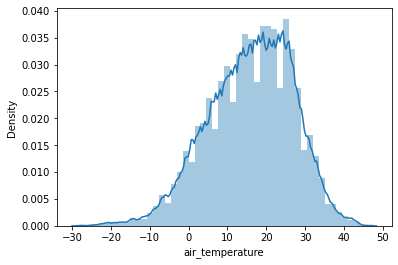

In [ ]:
sns.distplot(data['air_temperature'])
plt.show()

Plot variabel ```air_temperature``` cenderung mirip dengan distribusi normal namun sedikit menceng kanan. Pada statistika deskriptif kita dapati nilai ```mean = 1.59``` dan ```median = 1.67```, maka missing values akan diimput dengan nilai mediannya.

In [ ]:
data['air_temperature']=data['air_temperature'].fillna(data['air_temperature'].median())

**```dew_temperature```**

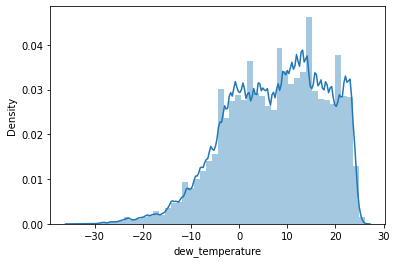

In [ ]:
sns.distplot(data['dew_temperature'])
plt.show()

Dari plot di atas, dapat dilihat bahwa data ```dew_temperature``` cenderung menceng kanan. Dari statistika deskriptif kita dapat nilai ```mean = 7.75``` dan ```median = 8.9``` maka missing values akan diimput dengan nilai mediannya.

In [ ]:
data['dew_temperature']=data['dew_temperature'].fillna(data['dew_temperature'].median())

**```sea_level_pressure```**

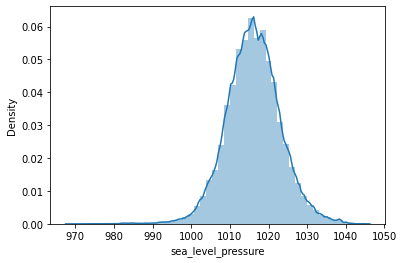

In [ ]:
sns.distplot(data['sea_level_pressure'])
plt.show()

Dari plot di atas dapat dilihat bahwa persebaran data cukup berpusat di tengah. Dari statistika deskriptif didapat nilai ```mean = 1.016``` dan ```median = 1.016``` juga. Kami memutuskan untuk mengisi missing values dengan nilai meannya.

In [ ]:
data['sea_level_pressure']=data['sea_level_pressure'].fillna(data['sea_level_pressure'].mean())

**```wind_direction```**

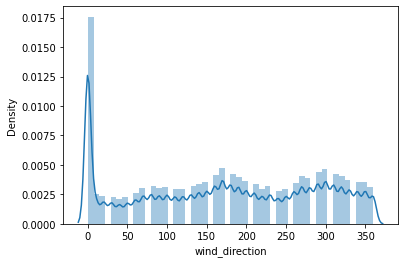

In [ ]:
sns.distplot(data['wind_direction'])
plt.show()

Dari plot dapat dilihat bahwa data cenderung tersebar merata namun cukup tinggi di ```0```, sehingga kami akan imput missing values dengan ```0```.

In [ ]:
data['wind_direction']=data['wind_direction'].fillna(0)

**```wind_speed```**

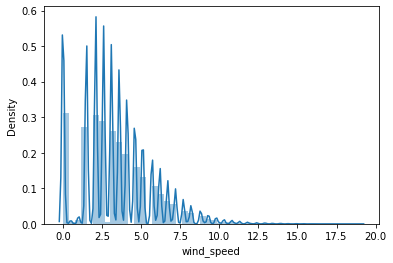

In [ ]:
sns.distplot(data['wind_speed'])
plt.show()

Dari plot dapat dilihat bahwa data cenderung menceng kiri. Dari statistika deskriptif didapat nilai ```mean = 1.73``` dan ```median = 1.80```, sehingga missing values akan diimput dengan nilai meannya.

In [ ]:
data['wind_speed']=data['wind_speed'].fillna(data['wind_speed'].mean())

**```precip_depth_1_hr```**

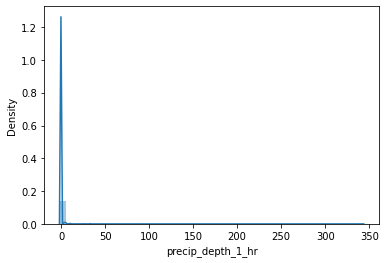

In [ ]:
sns.distplot(data['precip_depth_1_hr'])
plt.show()

Karena terdapat outlier yang sangat berbeda dari kebanyakan data di ```precip_depth_1_hr```, maka plot terlihat sangat lancip. Namun dapat dilihat bahwa banyak data tersebar di sekitar 0. Jika dilihat dari statistika deskriptif pun, kami dapat nilai ```median = 0, mean = 0```, sehingga kami putuskan untuk mengimput missing values dengan 0.

In [ ]:
data['precip_depth_1_hr']=data['precip_depth_1_hr'].fillna(0)

**Outliers**

Kami berpikir bahwa outliers pada data ini adalah valid.Maka dari itu, kami memutuskan untuk membiarkan outlier-outlier tersebut tetap dalam data.

#### **Data baru**

In [ ]:
data.head()

,site_id,building_id,primary_use,square_feet,meter,timestamp,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,0,2016-01-01 00:00:00,0.0,25.0,20.0,0.0,1019.7,0.0,0.0
1,0,0,Education,7432,0,2016-01-01 01:00:00,0.0,24.4,21.1,-1.0,1020.2,70.0,1.5
2,0,0,Education,7432,0,2016-01-01 02:00:00,0.0,22.8,21.1,0.0,1020.2,0.0,0.0
3,0,0,Education,7432,0,2016-01-01 03:00:00,0.0,21.1,20.6,0.0,1020.1,0.0,0.0
4,0,0,Education,7432,0,2016-01-01 04:00:00,0.0,20.0,20.0,-1.0,1020.0,250.0,2.6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   site_id             category      
 1   building_id         category      
 2   primary_use         category      
 3   square_feet         int64         
 4   meter               category      
 5   timestamp           datetime64[ns]
 6   meter_reading       float64       
 7   air_temperature     float64       
 8   dew_temperature     float64       
 9   precip_depth_1_hr   float64       
 10  sea_level_pressure  float64       
 11  wind_direction      float64       
 12  wind_speed          float64       
dtypes: category(4), datetime64[ns](1), float64(7), int64(1)
memory usage: 1.6 GB


Data terdiri dari 13 kolom dan 20216099 observasi. Terdapat:
* 4 data kategori
* 8 data numerik (float dan integer)
* 1 data datetime

#### **Statistika Deskriptif** 2

Selanjutnya berikut adalah statistika deskriptif data yang sudah melalui proses cleansing.

##### **Numerical data**

In [ ]:
data.describe()

,square_feet,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07
mean,1.077830e+05,2.117121e+03,1.599136e+01,7.753139e+00,6.487224e-01,1.016085e+03,1.606137e+02,3.377525e+00
std,1.171424e+05,1.532356e+05,1.092120e+01,1.015375e+01,6.748064e+00,6.842077e+00,1.186105e+02,2.257628e+00
min,2.830000e+02,0.000000e+00,-2.890000e+01,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.252700e+04,1.830000e+01,8.900000e+00,3.000000e-01,0.000000e+00,1.011900e+03,4.000000e+01,2.100000e+00
50%,7.270900e+04,7.877500e+01,1.670000e+01,8.900000e+00,0.000000e+00,1.016085e+03,1.600000e+02,3.100000e+00
75%,1.391130e+05,2.679840e+02,2.390000e+01,1.600000e+01,0.000000e+00,1.020200e+03,2.700000e+02,4.600000e+00
max,8.750000e+05,2.190470e+07,4.720000e+01,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


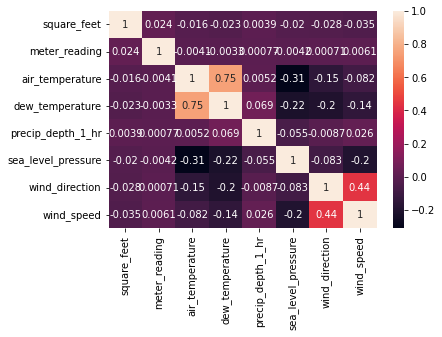

In [ ]:
#heatmap correlation
sns.heatmap(data.corr(),annot=True)


##### **Categorical data**

Pada bagian ini, kami akan melakukan visualisasi pada data-data kategorik. Visualisasi dilakukan dengan pie chart pada setiap variabel kategorik (kecuali building_id).

**```meter```**

In [ ]:
df = px.data.tips()
fig1 = px.pie(df, values=data['meter'].value_counts(), names=jenis_meter, color_discrete_sequence=px.colors.sequential.RdBu)
fig1.show()

Dari pie chart di atas dapat dilihat bahwa modus dari jenis meter yang digunakan adalah ```0``` yaitu electricity. Sedangkan yang paling sedikit digunakan adalah ```2``` yaitu steam.

**```primary_use```**

In [ ]:
fig2 = px.pie(df, values=data['primary_use'].value_counts(), names=peruntukan_gedung, color_discrete_sequence=px.colors.sequential.RdBu)
fig2.show()

Dari pie chart di atas dapat dilihat bahwa gedung-gedung paling banyak digunakan untuk keperluan ```education```. Dan hanya sedikit gedung yang digunakan untuk keperluan ```Manufacturing/industrial Services```.

**```site_id```**

In [ ]:
fig3 = px.pie(df, values=data['site_id'].value_counts(), names=banyak_lokasi, color_discrete_sequence=px.colors.sequential.RdBu)
fig3.show()

Dari pie chart di atas dapat dilihat bahwa sebagian besar gedung berlokasi di ```site_0``` dan tidak berbeda jauh dengan ```site_1```. Sedangkan lokasi dengan jumlah gedung paling sedikit adalah ```site_15```

### **Save data after pre processing to drive**

In [ ]:
# data.to_csv('/content/drive/MyDrive/TUGAS 1 - Kelompok C - EDA dan Visualisasi Data (A) /Data after preprocessing.csv',index=False)